## ODEs (Differential Equations.jl)

[DifferentialEquations.jl](https://docs.sciml.ai/DiffEqDocs/stable/getting_started/) is one of the main selling points of using Julia. For a comparison with packages in other languages see [this blog post](https://www.stochasticlifestyle.com/comparison-differential-equation-solver-suites-matlab-r-julia-python-c-fortran/), and why you should not write your own solver see [this](https://nextjournal.com/ChrisRackauckas/why-you-shouldnt-use-eulers-method-to-solve-odes). For benchmarks comparing differential equations packages in multiple languages see [this](https://docs.sciml.ai/SciMLBenchmarksOutput/stable/MultiLanguage/ode_wrapper_packages/). The benchmarks show that the solvers in DifferentialEquations.jl are better.

In [27]:
using DifferentialEquations
using Plots

using Pkg
Pkg.add("DifferentialEquations")

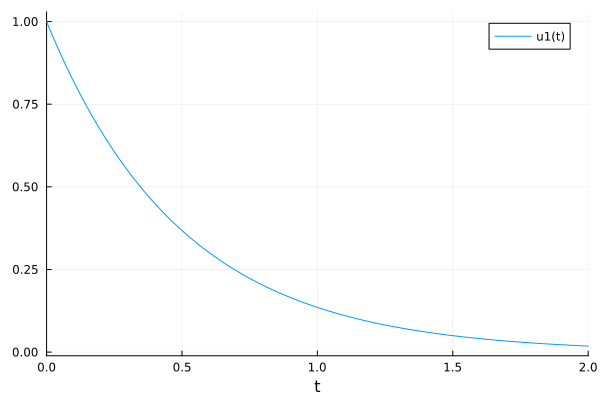

In [28]:

function simple_ode(dy, y, p, t)
    dy[1] = -2 * y[1]
end

y₀ = [1.0]
tspan = (0.0, 2.0)
prob = ODEProblem(simple_ode, y₀, tspan)

sol = solve(prob)

plot(sol)

#### Solving Lorenz

$$
dx/dt = \sigma(y-x) \\
dy/dt = x(\rho-z) - y \\
dz/dt = xy - \beta*z \\
$$

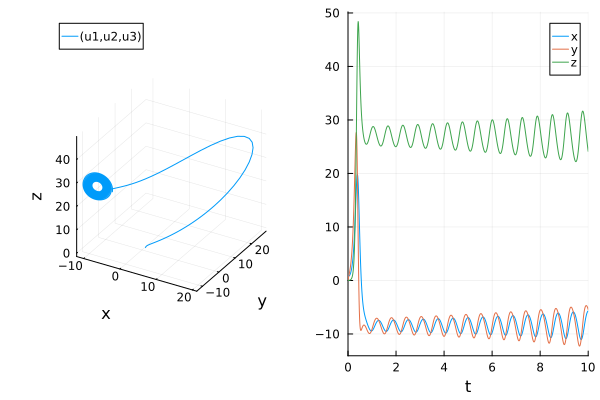

In [29]:
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end
u₀ = [1.0, 0.0, 0.0]
tspan = (0.0, 10.0)
p = (10.0, 28.0, 8/3)
prob = ODEProblem(lorenz!, u₀, tspan, p)

sol = solve(prob)

plot1 = plot(sol, 
             vars = (1,2,3), 
             xlabel="x",  
             ylabel="y", 
             zlabel="z",)
plot2 = plot(sol, label = ["x" "y" "z"])
plot(plot1, plot2, layout = (1, 2))

Let's solve this in Float16 now. This doesn't require much modification!

In [30]:
u0 = Float16[1.0, 0.0, 3.0]
tspan = Float16[0.0, 10.0]
p = Float16[10.0, 28.0, 8/3]
prob = ODEProblem(lorenz!, u₀, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 93-element Vector{Float16}:
  0.0
  0.00782
  0.01617
  0.02853
  0.0438
  0.0639
  0.089
  0.1207
  0.1572
  0.197
  ⋮
  8.34
  8.46
  8.56
  8.68
  8.78
  8.93
  9.03
  9.15
 10.0
u: 93-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9328965105588314, 0.2103859803493662, 0.0007890177832696866]
 [0.8835851682070488, 0.41976277912786225, 0.003135054272230169]
 [0.8470952923911469, 0.7109970689309765, 0.008969766957955995]
 [0.8531086143727266, 1.058830608764702, 0.019829253568503534]
 [0.9345777074908469, 1.5319483497468886, 0.04135771874286143]
 [1.142530944995275, 2.205967903786751, 0.08547875064846568]
 [1.5821952883382204, 3.30975984157886, 0.1921286705212229]
 [2.3892066380091572, 5.135878477818929, 0.4639293629113968]
 [3.78180051524641, 8.153233368226578, 1.1837328628342807]
 ⋮
 [-9.513099952054107, -11.547390235522279, 25.52491549928650

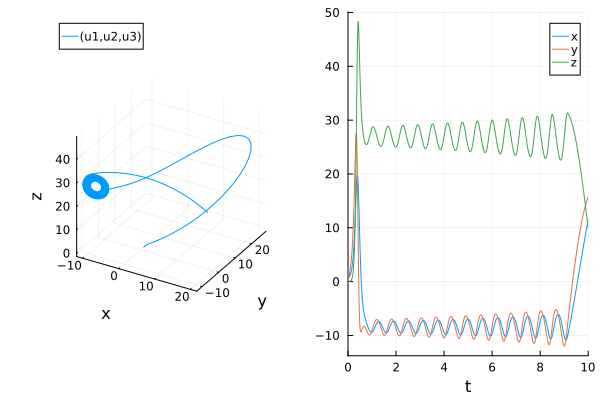

In [31]:
plot1 = plot(sol, 
             vars = (1,2,3), 
             xlabel="x",  
             ylabel="y", 
             zlabel="z",)
plot2 = plot(sol, label = ["x" "y" "z"])
plot(plot1, plot2, layout = (1, 2))

## Optimization (Optimization.jl)
If you want constrained optimization see [JuMP](https://jump.dev/JuMP.jl/stable/should_i_use/) (Which I have no experience with). 